<a href="https://colab.research.google.com/github/Rafaelalorenzini/Acoes_bolsa_valores/blob/main/A%C3%A7%C3%B5es_Bovespa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Valores das Ações de empresas presentes na B3

O índice Bovespa é o índice mais importante de desempenho médio das cotações das ações negociadas na B3. É formado pelas ações com maior volume negociado nos últimos meses.

A B3 - Brasil, Bolsa, Balcão é uma das principais empresas de infraestrutura de mercado financeiro do mundo.

A partir disso, será dado um enfoque para a queda do índice Bovespa em março de 2020 comparando com a queda em 2008. Depois, será o foco será em algumas ações relevantes para o mercado financeiro.

OBS: não possuo a pretenção de prever, interpretar, desqualificar empresas que estão presentes na B3.

## Instalando e importando bibliotecas

In [ ]:
!pip install yfinance --upgrade --no-cache-dir
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as md
import matplotlib.ticker as ticker
import datetime
import seaborn as sns
import plotly.express as px
from pandas_datareader import data
import yfinance as yf

sns.set()
yf.pdr_override()

# Dados do índice Bovespa

Importanto os pontos diários do índice a partir do Yahoo Finance [referência](https://finance.yahoo.com/quote/%5EBVSP?p=%5EBVSP).

In [202]:
ibov = data.get_data_yahoo('^BVSP',start='2006-01-01')

[*********************100%***********************]  1 of 1 completed


Como pode-se notar no DataFrame abaixo, apresentam valores diários de abertura, máxima, mínima, fechamento, fechamento ajustado e volume negociado selecionados a partir de 2006.

In [203]:
ibov

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-01-02,33462.000000,33519.000000,32860.0000,33507.0000,33507.0000,0
2006-01-03,33507.000000,34563.000000,33507.0000,34541.0000,34541.0000,0
2006-01-04,34540.000000,35223.000000,34540.0000,35002.0000,35002.0000,0
2006-01-05,35006.000000,35088.000000,34681.0000,34936.0000,34936.0000,0
2006-01-06,35170.000000,35529.000000,34940.0000,35475.0000,35475.0000,0
...,...,...,...,...,...,...
2021-06-01,126218.000000,128363.000000,126218.0000,128267.0000,128267.0000,12496100
2021-06-02,128268.000000,129601.000000,128167.0000,129601.0000,129601.0000,12781100
2021-06-04,129600.000000,130137.000000,129148.0000,130126.0000,130126.0000,9814800


Ordenando os valores dos mais atuais aos mais antigos.

In [204]:
ibov.sort_values(by="Date", ascending=False).head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-08,130776.320312,130776.320312,129230.3125,129500.0625,129500.0625,0
2021-06-07,130125.000000,131190.000000,129498.0000,130776.0000,130776.0000,9655400
2021-06-04,129600.000000,130137.000000,129148.0000,130126.0000,130126.0000,9814800
2021-06-02,128268.000000,129601.000000,128167.0000,129601.0000,129601.0000,12781100
2021-06-01,126218.000000,128363.000000,126218.0000,128267.0000,128267.0000,12496100


No gráfico a seguir, é apresentado o valor do índice do Bovespa entre 2006 e a data de hoje, a média móvel dos últimos 20 e 200 dias. 


O menor índice Bovespa ocorreu com a crise de 2008 (27 de outubro de 2008 com 29.435 pontos), considerada por muitos economistas como a pior crise econômica desde a Grande Depressão na década de 1920. O início da crise ocorreu devido a uma bolha imobiliária nos EUA, causada pelo aumento nos valores imobiliários, que não foi acompanhado por um aumento de renda da população. Países como o Brasil sentiram menos os efeitos da crise, entretanto, houve uma forte queda no índece do Bovespa, isso porque os investidores ao redor do mundo estavam resgatando o dinheiro investido no Brasil devido à quebra de confiança no mercado. 

Para saber mais sobre a crise de 2008: [referência](https://www.politize.com.br/crise-financeira-de-2008/).

Já em 2020, por conta do Covid-19, houve uma grande queda na bolsa de valores brasileira. O índice Bovespa do dia 23 de março de 2020 atingiu sua mínima em 61.161 pontos e terminou o dia com 63.599 pontos, depois de uma sequência de *circuit breakers* [referência](https://www.infomoney.com.br/mercados/um-ano-dos-63-mil-pontos-a-trajetoria-do-ibovespa-desde-a-minima-durante-a-pandemia-e-o-que-esperar-daqui-para-frente/). Foi em 2020 também que houve um aumento expressivo no número de CPFs investindo em ações (eu fui uma delas) [referência](https://valorinveste.globo.com/mercados/renda-variavel/noticia/2020/09/02/numero-de-pessoas-fisicas-na-bolsa-cresce-ainda-mais-em-agosto-e-encosta-em-3-milhoes.ghtml).

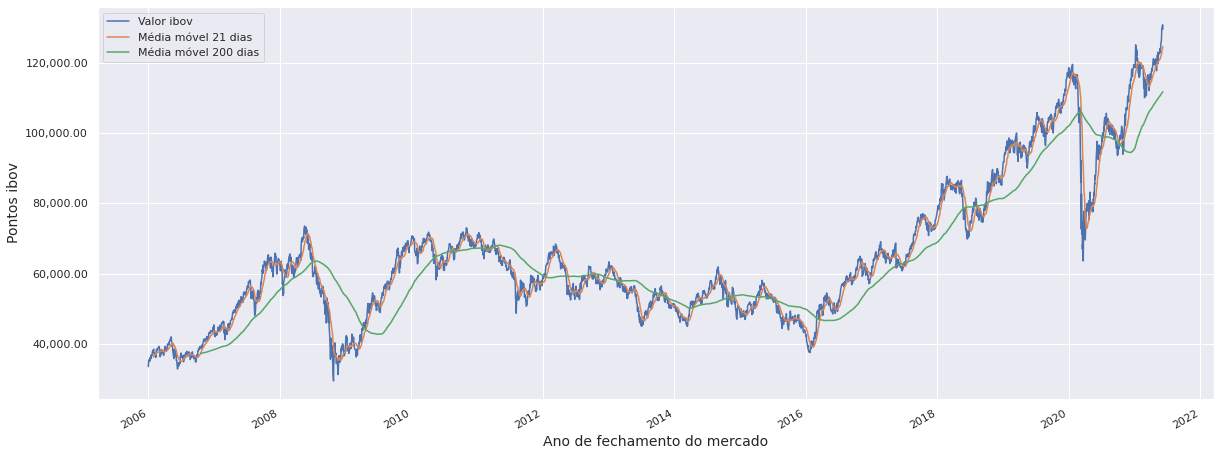

In [233]:
# Preço de fechamento ajustado
ax=ibov["Adj Close"].plot(figsize=(20, 8), label="Valor ibov")
# Média móvel 21 dias
ibov["Adj Close"].rolling(21).mean().plot(label="Média móvel 21 dias")
# Média móvel 200 dias
ibov["Adj Close"].rolling(200).mean().plot(label="Média móvel 200 dias")
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.xlabel('Ano de fechamento do mercado', fontsize=14)
plt.ylabel('Pontos ibov', fontsize=14)
plt.legend()
plt.show()

Para visualizar os dados de 2020, gerou-se novamente um DataFrame denominado ibov_2020. Era possível extrair os dados do outro DataFrame, no entanto, essa é uma forma mais fácil.

In [232]:
ibov_2020 = data.get_data_yahoo('^BVSP',start='2020-01-01')

[*********************100%***********************]  1 of 1 completed


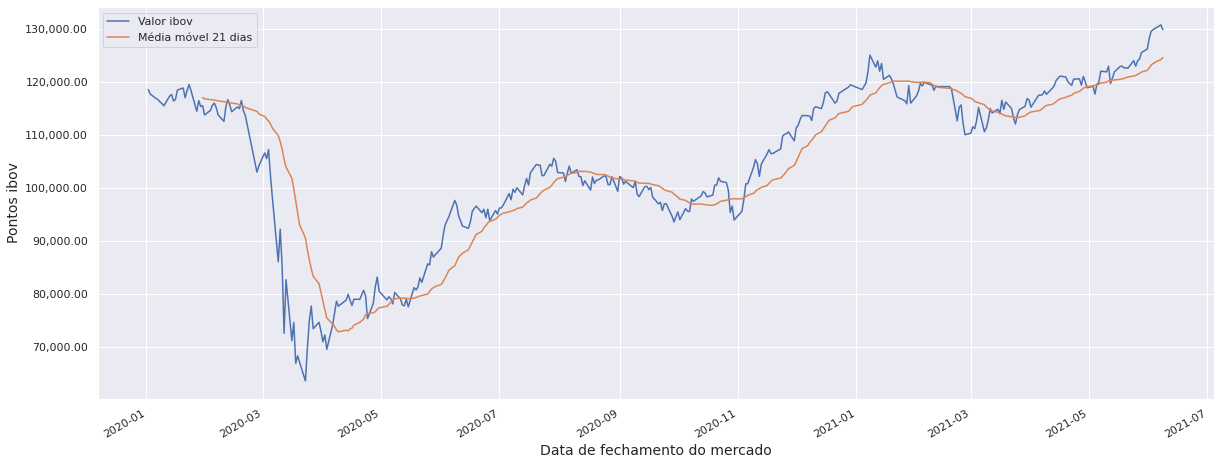

In [234]:
# Preço de fechamento ajustado
ax=ibov_2020["Adj Close"].plot(figsize=(20, 8), label="Valor ibov")
# Média móvel 21 dias
ibov_2020["Adj Close"].rolling(21).mean().plot(label="Média móvel 21 dias")

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.xlabel('Data de fechamento do mercado', fontsize=14)
plt.ylabel('Pontos ibov', fontsize=14)
plt.legend()
plt.show()

# Ações na B3

Agora em relação às ações, foram selecionadas algumas mais comercializadas na B3. São elas: **Gol, CVC, Weg, Magazine Luiza, Ambev, Petrobrás e Itaú**. Para compará-las ao índice Bovespa, foi selecionado o **BOVA11**. 

O i**Shares Ibovespa Fundo de Índice** (BOVA11) é um ETF (Fundo negociado na bolsa) que busca refletir a performance, antes das taxas e despesas, do Índice Bovespa. Foi criado em 2008 e consiste principalmente nas ações que compõem a carteira teórica do Índice. O gestor é a Black Rock Brasil, o administrador é o Banco BNP Paribas. É possível realizar investimento em lotes a partir de 50.000 cotas [referência](https://www.infomoney.com.br/cotacoes/etf-bova11/). 




In [249]:
acoes = ['GOLL4.SA','CVCB3.SA','WEGE3.SA','MGLU3.SA','ABEV3.SA','PETR3.SA','ITUB4.SA','BOVA11.SA']

In [ ]:
todas_acoes = pd.DataFrame()

for acao in acoes:
    todas_acoes[acao] = data.DataReader(acao, data_source='yahoo', start='2018-01-01')['Adj Close'] ##'Adj Close' é o fechamento ajustado da bolsa

In [265]:
#renomeando as ações para facilitar utilizando o formato de dicionário
todas_acoes = todas_acoes.rename(columns={'GOLL4.SA':'GOL','CVCB3.SA':'CVC','WEGE3.SA':'WEGE',
                                    'MGLU3.SA':'MGLU','ABEV3.SA':'ABEV','PETR3.SA':'PETR','ITUB4.SA':'ITUB','BOVA11.SA':'BOVA'})
todas_acoes.head()

,GOL,CVC,WEGE,MGLU,ABEV,PETR,ITUB,BOVA
Date,,,,,,,,
2018-01-02,15.19,49.004444,9.188702,2.392650,19.844748,15.715387,25.143023,75.099998
2018-01-03,15.01,48.719536,9.049147,2.362478,19.890491,15.914886,25.314926,75.300003
2018-01-04,15.58,49.112518,8.961005,2.419202,19.780704,16.050915,25.842077,76.000000
2018-01-05,15.66,48.866901,8.997730,2.371529,19.853895,16.177870,25.916571,76.440002
2018-01-08,15.70,48.660587,9.071182,2.371830,19.817299,16.431784,25.830620,76.760002


In [253]:
todas_acoes = todas_acoes.reset_index()

No gráfico a seguir, apresenta o histórico do preço das ações presentes na B3 entre 2018 e a data de hoje, é possível visualizar a queda em todas as ações em consequência da pandemia do Covid-19. Algumas delas, como a MGLU, que focou no e-commerce, conseguiu crescer em meio à pandemia.

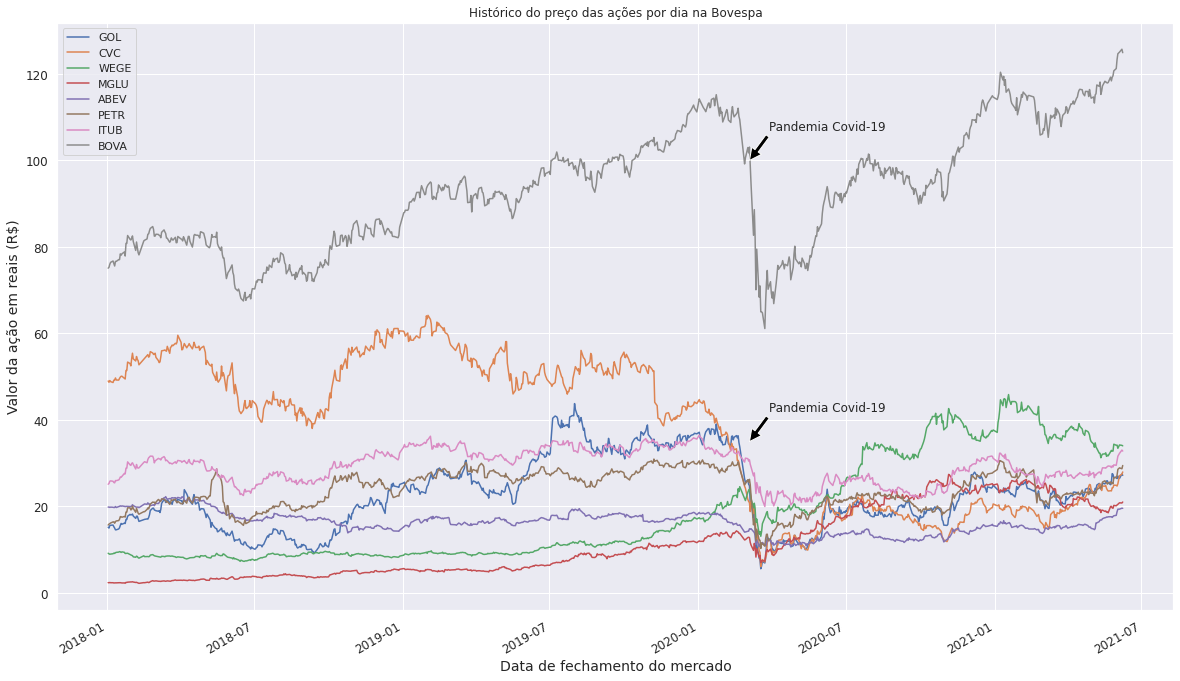

In [255]:
ax = todas_acoes.plot( x='Date', figsize=(20,12), title = 'Histórico do preço das ações por dia na Bovespa',fontsize=12)
plt.xlabel('Data de fechamento do mercado', fontsize=14)
plt.ylabel('Valor da ação em reais (R$)', fontsize=14)
ax.annotate('Pandemia Covid-19', (md.date2num(datetime.datetime(2020,3,4)),35),xytext=(20, 30), 
            textcoords='offset points', arrowprops=dict(facecolor ='black'))
ax.annotate('Pandemia Covid-19', (md.date2num(datetime.datetime(2020,3,4)),100),xytext=(20, 30), 
            textcoords='offset points', arrowprops=dict(facecolor ='black'))
plt.show()

Agora, é apresentado o mesmo gráfico anterior, no entanto, é possível visualizar de uma forma mais dinâmica (posicionando o cursor no gráfico/dando *zoom*).

In [256]:
df_long=pd.melt(todas_acoes, id_vars=['Date'], value_vars=['GOL', 'CVC', 'WEGE', 'MGLU', 'ABEV', 'PETR', 'ITUB','BOVA'])
fig = px.line(df_long, x='Date', y='value', color='variable')
fig.show()

Em relação à análise estatística das ações, foi criado um DataFrame com a variação diária do valor da ação, isto é, um dia menos o outro.

In [260]:
daily_simple_returns = todas_acoes.pct_change(1)
daily_simple_returns.head()

,GOL,CVC,WEGE,MGLU,ABEV,PETR,ITUB,BOVA
Date,,,,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,-0.011850,-0.005814,-0.015188,-0.012610,0.002305,0.012694,0.006837,0.002663
2018-01-04,0.037975,0.008066,-0.009740,0.024010,-0.005520,0.008547,0.020824,0.009296
2018-01-05,0.005135,-0.005001,0.004098,-0.019706,0.003700,0.007910,0.002883,0.005790
2018-01-08,0.002554,-0.004222,0.008163,0.000127,-0.001843,0.015695,-0.003316,0.004186


Correlação entre ativos é uma medida estatística que demonstra a relação entre ativos. Por essa medida, podemos descobrir se, por exemplo, quando o preço de determinado ativo cai, o de outro ativo tende a subir. A correlação pode ser positiva (=1), negativa (=-1) e neutra (=0) [referência](https://blog.ativainvestimentos.com.br/correlacao-entre-ativos/).

Pode-se notar na matriz, as maiores correlações com o índice Bovespa são as ações da Petrobrás (maior estatal brasileira) e do Itaú (banco). Além disso, todas as ações possuem correlação positiva com o índice, isso significa que se a bolsa de valores está em queda, é previsível que as ações diminuam também.

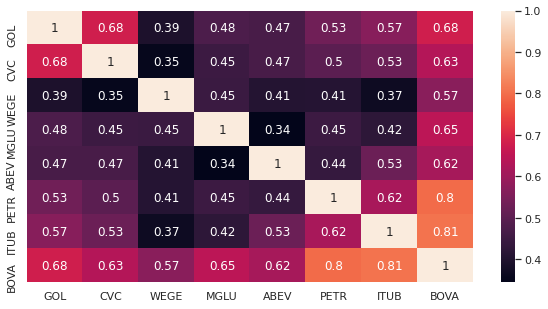

In [262]:
plt.subplots(figsize=(10, 5))
sns.heatmap(daily_simple_returns.corr(), annot=True)
plt.show()

A volatilidade (variância) nada mais é do que uma medida de risco de um ativo. Isto é, a velocidade pela qual ele pode se movimentar para cima e para baixo em curtos períodos de tempo.

No usual, é dito que se uma ação sobe muito em um dia, no outro dia irá baixar para poder estabilizar. Com isso, no mercado financeiro espera-se um aumento crescente e não uma subida abrupta, após uma decida abrupta. 

O turismo foi um dos segmentos mais impactados pela pandemia, também é este segmento que possui o maior risco de um ativo. Por outro lado, o segmento de bancos é que possui a menor variação neste caso, era previsto, pois é o segmento que detém o dinheiro. 

In [264]:
daily_simple_returns.var()

GOL     0.002389
CVC     0.001885
WEGE    0.000643
MGLU    0.001122
ABEV    0.000439
PETR    0.001127
ITUB    0.000502
BOVA    0.000352
dtype: float64

A covariância é um cálculo estatístico que torna possível a comparação de dois grupos de dados e, dessa forma, entender como eles se relacionam entre si. Transferindo isso para o mundo dos investimentos, seria basicamente entender o que acontece com o preço do ativo X quando o preço do ativo Y aumenta ou diminui. Através dessa análise, é possível fazer uma gestão de risco para a carteira de investimento, diversificar é justamente trazer maior segurança para quem investe [referência](https://www.capitalresearch.com.br/blog/investimentos/covariancia/).


---



A diagonal principal (da esquerda para a direita) representa a variância e o restante, a covariância.

Para interpretar a covariância seria necessário ter dados de segmentos iguais ou parecidos, no entanto é possível perceber que as ações de CVC e GOL possuem a maior covariância.

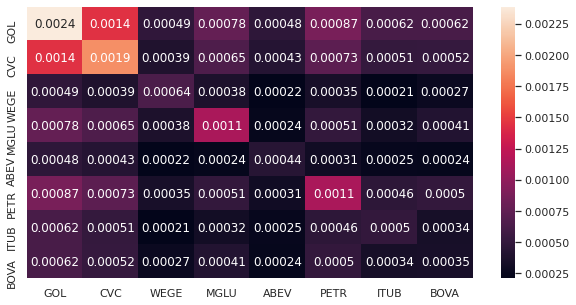

In [263]:
plt.subplots(figsize=(10, 5))
sns.heatmap(daily_simple_returns.cov(), annot=True)
plt.show()